# Loop Workflow Example 2

> * High level approach to making a 3D model from just a bounding box you can draw
> * To run this notebook for the first time, there are some dependencies needed to use the interactive map. Execute the cell immediately below and restart jupyter.

In [1]:
#!conda install -c conda-forge folium ipyleaflet ipywidgets -y 
#!conda install -c conda-forge folium ipyleaflet  -y 
#!jupyter nbextension enable --py --sys-prefix ipyleaflet
import warnings
warnings.filterwarnings('ignore')

## Leaflet Maps

In [2]:
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt

# load last saved map area and model engine (if they exist)
if(not os.path.isdir('../scratch/')):
    os.mkdir('../scratch/')
if(os.path.isfile('../scratch/last_choices.txt')):
    f=open('../scratch/last_choices.txt','r')
    contents =f.readlines()
    f.close()
    default_map=contents[0].replace("\n","")
    default_engine=contents[1].replace("\n","")
else:
    default_map='Turner_Syncline'
    default_engine='loopstructural'

options=['Draw Your Own','Last Area Drawn']

if(not default_map in options):
    default_map= options[0]

map_choice=widgets.Dropdown(
    options=options,
    value=default_map,
    description='Map area:',
    disabled=False,
)
display(map_choice)

Dropdown(description='Map area:', options=('Draw Your Own', 'Last Area Drawn'), value='Draw Your Own')

In [3]:
test_data_name=map_choice.value
print(test_data_name)

Draw Your Own


In [4]:
import folium
import pandas as pd
import json
import random
from shapely.geometry import Polygon
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData, FullScreenControl, ScaleControl
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import geopandas as gpd

if(not test_data_name =='Draw Your Own'):
    if(test_data_name=='Last Area Drawn'):
        last_coords=pd.read_csv('../scratch/last_area.csv')
        display(last_coords)
        minx=last_coords.iloc[0]['minx']
        miny=last_coords.iloc[0]['miny']
        maxx=last_coords.iloc[0]['maxx']
        maxy=last_coords.iloc[0]['maxy']
    elif(not test_data_name =='Draw Your Own'):
        y_point_list = [miny, miny, maxy, maxy, maxy]
        x_point_list = [minx, maxx, maxx, minx, minx]
        bbox_geom = Polygon(zip(x_point_list, y_point_list))
        polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
        polygon_ll=polygon.to_crs(src_crs)

        minx=polygon_ll.total_bounds[0]
        maxx=polygon_ll.total_bounds[2]
        miny=polygon_ll.total_bounds[1]
        maxy=polygon_ll.total_bounds[3]

        minlong=minx
        maxlong=maxx
        minlat=miny
        maxlat=maxy
        #print("x",polygon_ll.total_bounds[0])
        st_bbox=[minlong,minlat,maxlong,maxlat]
        lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
        lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
        bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
        rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)

    bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
    y_point_list = [miny, miny, maxy, maxy, maxy]
    x_point_list = [minx, maxx, maxx, minx, minx]
    bbox_geom = Polygon(zip(x_point_list, y_point_list))
    polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
    polygon_ll=polygon.to_crs(src_crs)

    minlong=polygon_ll.total_bounds[0]
    maxlong=polygon_ll.total_bounds[2]
    minlat=polygon_ll.total_bounds[1]
    maxlat=polygon_ll.total_bounds[3]
    
    minlong=minx
    maxlong=maxx
    minlat=miny
    maxlat=maxy

    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    example_rect = GeoData(geo_dataframe = rect,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
    center=(minlat+((maxlat-minlat)/2),minlong+((maxlong-minlong)/2))
else:
    center=(-22.6,117.3)
    
wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'
)
wms_faults = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:gswa_2_5m_interpstrucl15',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Linear features data from GSWA',
    name='faults/folds'
)

m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_faults)
m.add_layer(wms_warox)
if( not test_data_name =='Draw Your Own'):
    m.add_layer(example_rect)

    


m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='topright'))

dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [6]:
#polyclip=True

if(test_data_name=='Draw Your Own' or test_data_name=='Last Area Drawn'):
    if(test_data_name=='Draw Your Own'):
        src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
        dst_crs = "epsg:28350" # coordinate system for example data
        
        new_poly=GeoJSON(data=dc.last_draw)
        
        flat_list = [item for sublist in new_poly.data['geometry']['coordinates'] for item in sublist]
        roi_clip = Polygon(flat_list)
        if(len(flat_list)>5 or polyclip):
            roi_clip_poly = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[roi_clip])
            roi_clip_poly=roi_clip_poly.to_crs(dst_crs)
            use_roi_clip=True
            roi_clip_path='./roi.shp'
            roi_clip_poly.to_file(roi_clip_path)

        else:
            use_roi_clip=False
            
        new_poly=str(new_poly)
        if("'geometry': None" in new_poly):
            raise NameError('map2loop error: No rectangle selected')
        new_poly=new_poly.rsplit("'coordinates': ", 1)[1]
        new_poly=new_poly.replace('[[[','').replace('[','').replace(']]]}})','').replace('],','').replace(',','').split(" ")
        longs=new_poly[0::2]
        lats=new_poly[1::2]
        minlong=float(min(longs))
        maxlong=float(max(longs))
        minlat=float(max(lats)) #ignores sign
        maxlat=float(min(lats)) #ignores sign
        
    bounds=(minlong,maxlong,minlat,maxlat)


    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    mbbox = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 
    bbox=mbbox.total_bounds
    st_bbox=[bbox[0],bbox[1],bbox[2],bbox[3]]
    print(src_crs,mbbox.total_bounds)
    mbbox=mbbox.to_crs(dst_crs)
    print(dst_crs,mbbox.total_bounds)
    
    f=open('../scratch/last_area.csv','w') 
    ostr='minx,miny,maxx,maxy\n'
    f.write(ostr)
    ostr=str(minlong)+','+str(minlat)+','+str(maxlong)+','+str(maxlat)+'\n'
    f.write(ostr)
    f.close()
    

epsg:4326 [117.147369 -22.710956 117.526446 -22.45736 ]
epsg:28350 [ 515134.57685341 7488380.8437596   554164.77596113 7516540.83509794]


In [7]:
import time
import warnings

t0 = time.time()
warnings.filterwarnings('ignore')


## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 520512.91272022 7489335.50974713  553905.120414   7516513.64798743]
    CRS None
    # items 52
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 455101.5591864  7430805.86939398  654057.86605368 7540137.5520702 ]
    CRS None
    # items 42
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    bbox [ 515150.15293241 7488747.22856833  554132.21980247 7516502.53635533]
    CRS None
    # items 5
    Data types ['LineString']
original no of faults: 28

 fault layer  metadata
--------------------
    bbox [ 515139.23459187 7488397.81216811  552794.04956652 7516533.308072  ]
    CRS +init=epsg:28350 +type=crs
    # items 24
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 517270.57612148 7488800.05461359  551146.18884133 7516001.66076483]
    CRS None
    # items 62
    Data types ['Point']

 mindeps layer  metadata
---------------

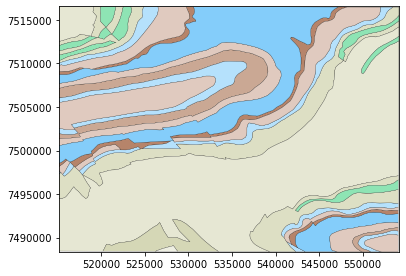

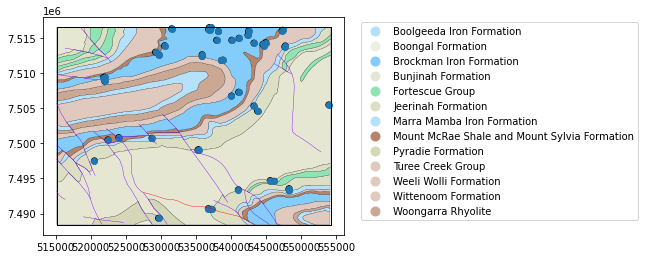

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
42  polygons
Successful parameter load
Output directory created at: ./model-test2\graph
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Turee Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
3    'Boolgeeda Iron Formation'
4    'Boongal Formation'
5    'Brockman Iron Formation'
6    'Bunjinah Formation'
7    'Fortescue Group'
8    'Jeerinah Formation'
9    'Marra Mamba Iron Formation'
10    'Mount McRae Shale and Mount Sylvia Formation'
11    'Pyradie Formation'
12    'Turee Creek Group'
13    'Weeli Wolli Formation'
14    'Wittenoom Formation'
15    'Woongarra Rhyolite'
Topology figure saved to ./model-test2\tmp\topology-fig.png


 10%|████████                                                                         | 10/100 [00:02<00:24,  3.72it/s]

Done
Fetching DTM...  bbox:117.04709949444343 117.62741053230364 -22.81175443731069 -22.356568572552348
source= WA
Attempt: 0 ...dtm geotif saved as ./model-test2\dtm\dtm.tif
Succeeded !
./model-test2\dtm\dtm.tif ./model-test2\dtm\dtm_rp.tif {'init': 'EPSG:4326'} {'init': 'epsg:28350'}
reprojected dtm geotif saved as ./model-test2\dtm\dtm_rp.tif


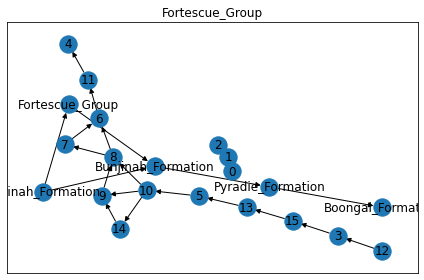

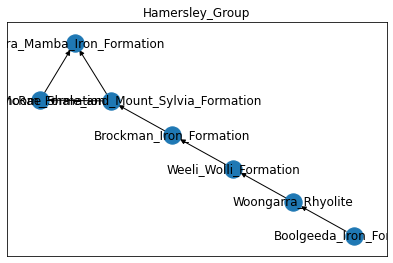

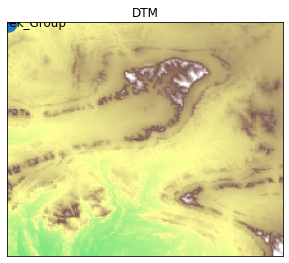

 30%|████████████████████████▎                                                        | 30/100 [00:05<00:10,  6.67it/s]

group choices: 1
dtb and dtb_null set to 0
51 orientations saved to ./model-test2\output\orientations.csv


 50%|████████████████████████████████████████▌                                        | 50/100 [00:05<00:04, 12.18it/s]

extra orientations saved as /empty_series_orientations.csv
basal contacts saved allpts =  1415 deci_pts =  400
saved as ./model-test2\tmp\all_contacts.csv and ./model-test2\tmp\contacts.csv
basal contacts without faults saved as ./model-test2\tmp\basal_contacts.shp
decimated contacts saved as ./model-test2\output\contacts4.csv


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:13<00:11,  3.57it/s]

All observations n= 52
groups ['Hamersley Group' 'Fortescue Group' 'Turee Creek Group'] 
codes ['Marra Mamba Iron Formation' 'Wittenoom Formation' 'Jeerinah Formation'
 'Fortescue Group' 'Boolgeeda Iron Formation'
 'Mount McRae Shale and Mount Sylvia Formation' 'Bunjinah Formation'
 'Pyradie Formation' 'Boongal Formation' 'Brockman Iron Formation'
 'Weeli Wolli Formation' 'Woongarra Rhyolite' 'Turee Creek Group']


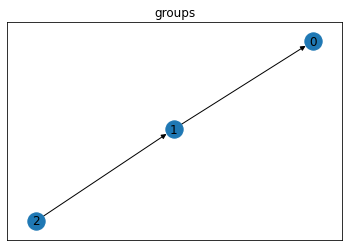

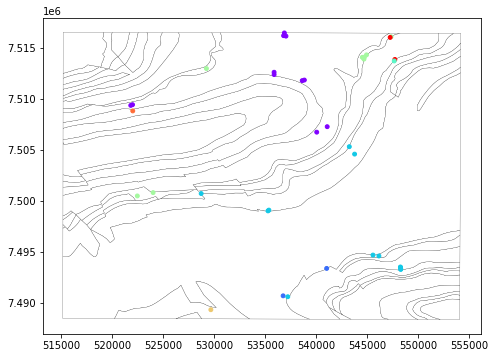

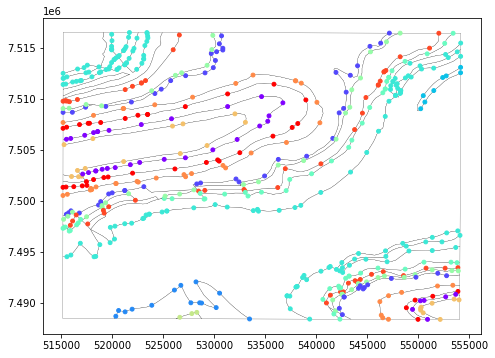

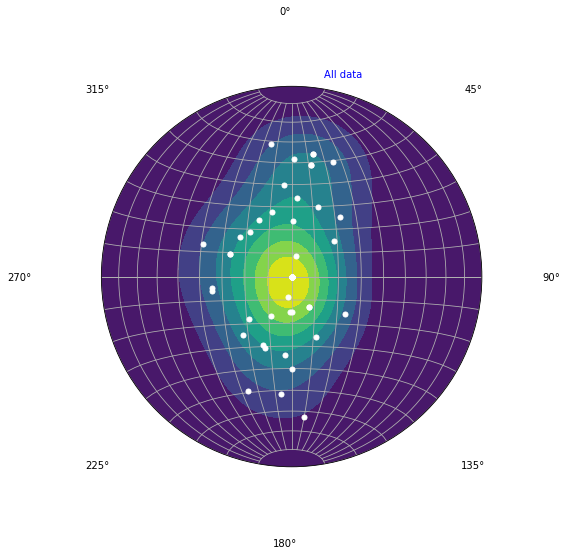

----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 34
strike/dip of girdle 188.4921217905984 / 86.89133031214887


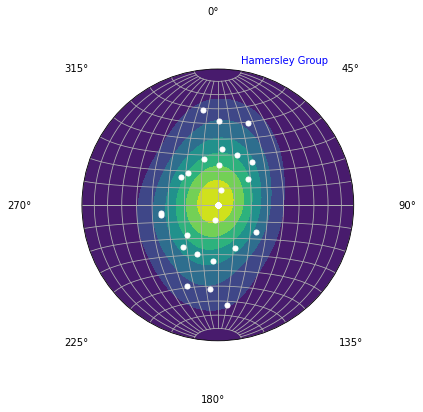

----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 17
strike/dip of girdle 183.57819236381232 / 84.07354573585555


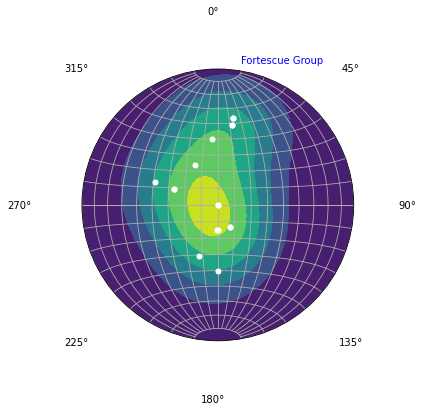

----------------------------------------------------------------------------------------------------------------------
Turee Creek Group observations has no observations
rbf_split 0 4504
['Hamersley Group', 'Fortescue Group', 'Turee Creek Group']
79 57
interpolated dips


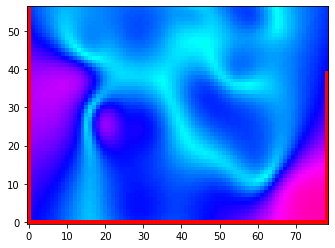

interpolated dip directions


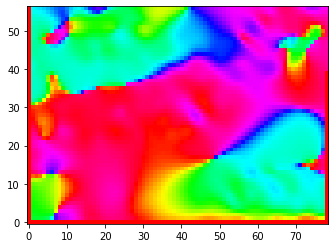

interpolated contacts


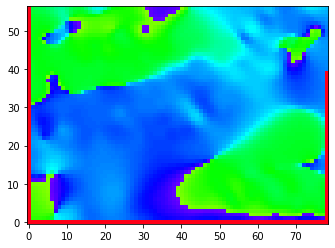

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:24<00:15,  1.92it/s]

fault orientations saved as ./model-test2\output\fault_orientations.csv
fault positions saved as ./model-test2\output\faults.csv
fault dimensions saved as ./model-test2\output\fault_dimensions.csv


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [01:01<00:11,  1.12s/it]

Fault Fault_2235 with displacement of 1692 capped to 705.204811901925
Fault Fault_2843 with displacement of 603 capped to 568.1394826538358
Fault Fault_2843 with displacement of 1304 capped to 568.1394826538358
Fault Fault_2843 with displacement of 1367 capped to 568.1394826538358
Fault Fault_3496 with displacement of 1023 capped to 1013.7384982889491
Fault Fault_12647 with displacement of 997 capped to 982.1526794039091
Fault Fault_12660 with displacement of 408 capped to 374.7467886181803
Fault Fault_12660 with displacement of 380 capped to 374.7467886181803
Fault Fault_14378 with displacement of 766 capped to 730.0379814878006
Fault Fault_16769 with displacement of 593 capped to 394.20913263247763
fault displacement estimates saved as ./model-test2\output\fault_displacements3.csv
near-fault orientations saved as ./model-test2\tmp\ex_f_combo_full.csv
near-fault orientations saved as ./model-test2\tmp\ex_f_combo_full.csv
0 Turee_Creek_Group
1 Hamersley_Group
2 Fortescue_Group
pluton c

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.28s/it]

cycles []
Hamersley_Group_gp
Fortescue_Group_gp
Turee_Creek_Group_gp
Exporting graphical map...

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:20<00:00,  1.25it/s]


Geology graphic exported to:  ./model-test2\./model-test2


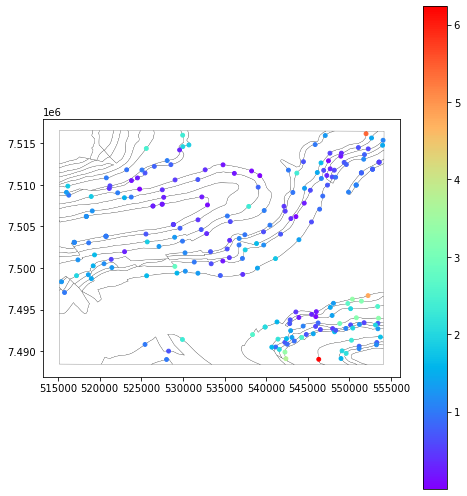

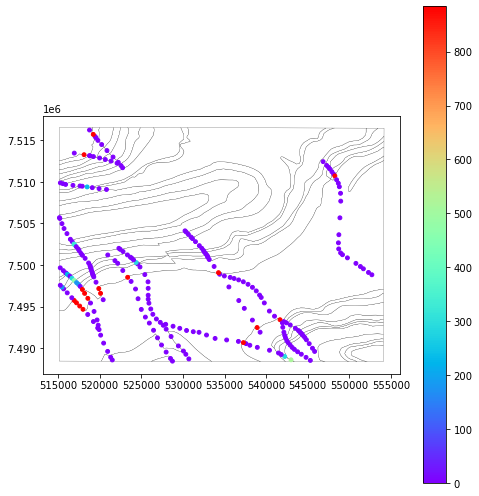

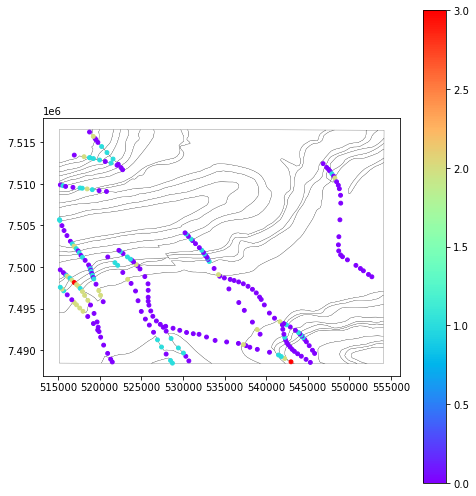

In [10]:
import os
from map2loop.project import Project
out_dir='./model-test2'
proj = Project(
                loopdata_state="WA",
                #dtm_file="http://services.ga.gov.au/gis/services/DEM_SRTM_1Second_over_Bathymetry_Topography/MapServer/WCSServer?",
                #dtm_file='https://webmap.ornl.gov/cgi-bin/mapserv?&coverage=10008_1&service=WCS?'
                )

proj.update_config(
                    out_dir=out_dir,
                    overwrite='in-place',  #'in-place','true'
                    #loopFilename='m2l.loop3d',
                    #drift_prefix=['T', 'Q', 'water', 'void'],
                    #clut_path='SA/data/GSSA_2M_colours.csv',                    
                    bbox_3d={
                         "minx": mbbox.total_bounds[0], #500000,
                         "miny": mbbox.total_bounds[1], #7490000,
                         "maxx": mbbox.total_bounds[2], #545000,
                         "maxy": mbbox.total_bounds[3], #7520000,
                         "base": -4800,
                         "top": 1200,
                    },
                    proj_crs={'init': 'epsg:28350'},
                    quiet='None', # 'all', None', 'no-figures',
                    #run_flags={'fault_length_clusters':4,'fault_orientation_clusters':4},
                    run_flags={'use_roi_clip': use_roi_clip,'roi_clip_path': roi_clip_path},
                  )
proj.config.c_l['intrusive']='granite'
proj.run()

## Loop Structural

In [11]:
# Define project pathing from m2l
t1 = time.time()
print("m2l",(t1-t0)/60.0,"minutes")
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv

m2l 2.195173688729604 minutes


In [12]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from datetime import datetime
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.ERROR)
import lavavu
import numpy as np
import math

surface_verts = {}

def function(xyz,tri,name):
    xyz = np.copy(xyz)
    tri = np.copy(tri)
    nanmask = np.all(~np.isnan(xyz),axis=1)
    vert_idx = np.zeros(xyz.shape[0],dtype=int) -1
    vert_idx[nanmask] = np.arange(np.sum(nanmask))
    tri[:] = vert_idx[tri]
    tri = tri[np.all(tri > -1,axis=1),:]
    xyz = xyz[nanmask,:]
    surface_verts[name] = (xyz,tri)
t1a = time.time()

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()


fault_params = {'interpolatortype':'FDI',
#                 'nelements':1e5,
#                 'element_volume':3000**3,
                'step':10,
                'fault_buffer':0.3,
#                 'force_mesh_geometry':True,
                'solver':'cg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':1.8,  # how much to extend nterpolation around box
                    'solver':'cg',
#                     'damp':True
                    'cpw':10,
                    'npw':10
                   }
model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          #    evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
                                                          foliation_params=foliation_params,
                                                         skip_features=['Fault_16245'])
#model.to_file(output_path + "/model.pickle")    

view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
view.nsteps=np.array([50,50,50])
#view.add_model_surfaces(filename=filename)
#view.add_model_surfaces()
for sg in model.feature_name_index:
    if( 'super' in sg):
        view.add_data(model.features[model.feature_name_index[sg]])
view.nelements = 1e5
view.add_model_surfaces(function=function,filename=filename,faults=False)
view.nelements=1e6
#view.add_model_surfaces(function=function,filename=filename,strati=False,displacement_cmap = 'rainbow')
view.add_model_surfaces(function=function,filename=filename,strati=False)
view.lv.webgl(vtk_path+model_name)
view.nsteps = np.array([200,200,200])
#name=vtk_path+model_name
#view.add_model_surfaces(callback_function=lambda xyz, tri, name: np.savetxt(name+'_verts.txt',xyz))
#view.add_model_surfaces(function=lambda xyz, tri, name: print(name))
view.add_model()

view.lv.control.Range('alpha', label="Global Opacity")
view.lv.control.DualRange(['xmin', 'xmax'], label="x clip", step=0.01, values=[0.0,1.0])
view.lv.control.DualRange(['ymin', 'ymax'], label="y clip", step=0.01, values=[0.0,1.0])
view.lv.control.DualRange(['zmin', 'zmax'], label="z clip", step=0.01, values=[0.0,1.0])
view.lv.control.Range(command='background', range=(0,1), step=0.1, value=0.8)
view.lv.control.show() #Show the control panel, including the viewer window

for layer in surface_verts:
    f=open(vtk_path+model_name+'/'+layer.replace("_iso_0.000000","")+'.obj','w')
    vert=surface_verts[layer][0].shape[0]
    tri=surface_verts[layer][1].shape[0]
    print(layer.replace("_iso_0.000000",""),vert,tri)
    for v in range(0,vert):
        ostr = "v {} {} {}\n"\
            .format(surface_verts[layer][0][v][0],surface_verts[layer][0][v][1],surface_verts[layer][0][v][2])
        f.write(ostr)
    for t in range(0,tri):
        ostr = "f {} {} {}\n"\
                .format(surface_verts[layer][1][t][0]+1,surface_verts[layer][1][t][1]+1,surface_verts[layer][1][t][2]+1)
        f.write(ostr)
    first=False
    f.close()
    
view.interactive()  

t2 = time.time()
print("m2l",(t1-t0)/60.0,"LoopStructural",(t2-t1a)/60.0,"Total",(t2-t1a+t1-t0)/60.0,"minutes")

Updating geological model. There are: 
37 geological features that need to be interpolated



  0%|          | 0/37 [00:00<?, ?it/s]

Model update took: 113.25744795799255 seconds


  0%|          | 0/13 [00:00<?, ?it/s]

Adding surfaces took 6.8667707443237305 seconds


  0%|          | 0/12 [00:00<?, ?it/s]

Adding surfaces took 98.67021584510803 seconds


Turee_Creek_Group 1039 1871
Boolgeeda_Iron_Formation 1565 2895
Woongarra_Rhyolite 2141 4007
Weeli_Wolli_Formation 2757 5195
Brockman_Iron_Formation 4258 8105
Mount_McRae_Shale_and_Mount_Sylvia_Formation 4744 9049
Wittenoom_Formation 5439 10380
Marra_Mamba_Iron_Formation 6046 11524
Jeerinah_Formation 7845 15221
Fortescue_Group 9057 17681
Bunjinah_Formation 9037 17607
Pyradie_Formation 8140 15777
Boongal_Formation 7160 13785
Fault_7439 3707 7104
Fault_2235 2829 5420
Fault_2248 1740 3292
Fault_2843 2339 4454
Fault_2997 4458 8546
Fault_3496 4801 9248
Fault_3498 4698 9039
Fault_12647 4061 7808
Fault_12658 4566 8800
Fault_12660 1283 2424
Fault_14378 3101 5948
Fault_16769 1613 3063


m2l 2.195173688729604 LoopStructural 4.261141486962637 Total 6.45631517569224 minutes


In [16]:
#saved_model=GeologicalModel.from_file(output_path + "/model.pickle")

In [17]:
from LoopStructural.analysis import calculate_fault_topology_matrix, calculate_fault_intersections
#topo_mat = calculate_fault_topology_matrix(model)
fault_intersections = calculate_fault_intersections(model)
#display(topo_mat,fault_intersections)
fault_intersections.to_csv(output_path + "/3D_fault_intersections.csv")

In [18]:
extra_plots=True

## Overlay map over model

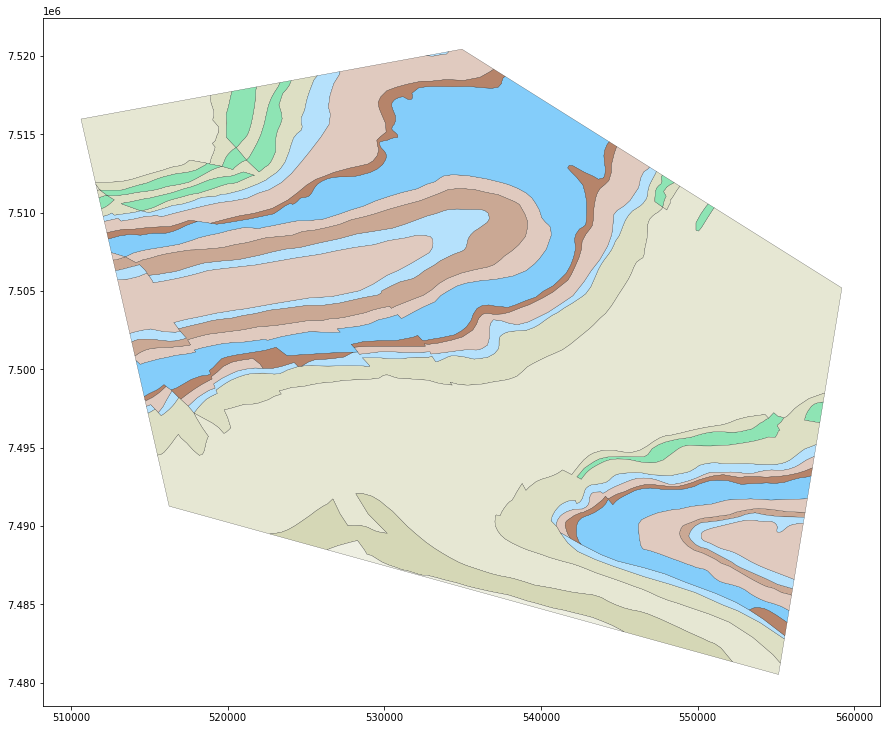

In [14]:
import matplotlib
c_l= {'c':'unitname', 'f':'feature',"fault": 'Fault'}
geol_clip=gpd.read_file(out_dir+'/tmp/geol_clip.shp')
if(extra_plots):
    import matplotlib.colors as colors
    clut_path ='./500kibg_colours.csv'
    if(clut_path ==''):
        geol_clip.plot(column=c_l['c'],figsize=(10,10),edgecolor='#000000',linewidth=0.2,)
        use_cmap=False
        cmap=0
    else:
        use_cmap=True
        asc=pd.read_csv(out_dir+'/tmp/all_sorts_clean.csv',",")
        #display(asc)
        colours=pd.read_csv(clut_path,",")
        if( c_l['c']=='CODE'):
            code=c_l['c'].lower()
        else:
            code=c_l['c']

        colours = [] #container for the discrete colours we are using
        i=0
        geol_clip['colour_index'] = np.nan #initialise a colour index attribute column
        for ind,strat in asc.iterrows():
            geol_clip[c_l['c']].str.replace(" ","_")
            geol_clip.loc[geol_clip[c_l['c']]==strat['code'].replace("_"," "),'colour_index'] = i
            colours.append(strat['colour'])
            i=i+1

        cmap = colors.ListedColormap(colours) # create a cmap for passing to geopandas
        #display(colours)
        fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
        geol_clip.plot(ax=ax,column='colour_index',figsize=(10,10),edgecolor='#000000',linewidth=0.2,cmap=cmap)


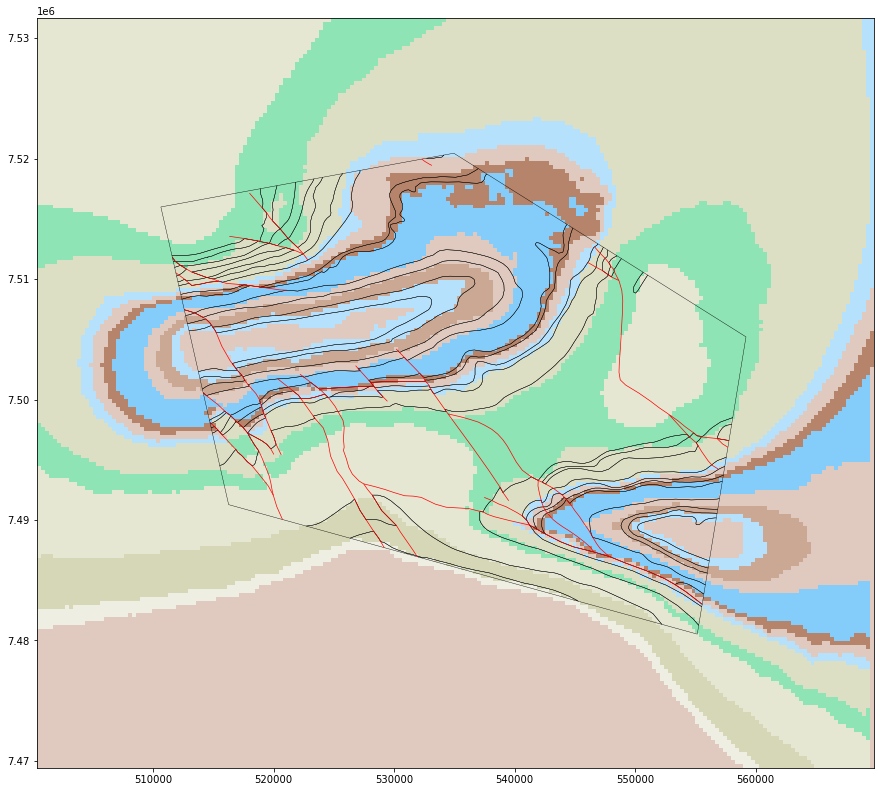

In [15]:
dtm_reproj_file=out_dir+'/dtm/dtm_rp.tif'
faults_clip=gpd.read_file(out_dir+'/tmp/faults_clip.shp')
from map2loop import m2l_export
import rasterio
if(extra_plots):  
    dtm = rasterio.open(dtm_reproj_file)
    if(os.path.exists(fault_file)):
        f_clip=faults_clip[faults_clip[c_l['f']].str.contains(c_l['fault'])]
        m2l_export.display_LS_map(model,dtm,geol_clip,f_clip,dst_crs,True,cmap,use_topo=True,use_faults=True)
    else:
        f_clip=[]
        m2l_export.display_LS_map(model,dtm,geol_clip,f_clip,dst_crs,True,cmap,use_topo=True,use_faults=False)

    dtm.close()


## Plot fault throw from m2l

In [ ]:
import math
def plot_arrows(point_source,geol_clip, colour_code,x_code,y_code,legend,dtype):
    from shapely.geometry import Point
    thick=pd.read_csv(point_source,encoding = "ISO-8859-1", dtype='object')
    if(dtype=='numeric'):
        thick['cc']=pd.to_numeric(thick[colour_code])
    else:
        thick['cc']=thick[colour_code].str.zfill(5)
    thick[x_code]=thick[x_code].astype('float64')
    thick[y_code]=thick[y_code].astype('float64')
    thick=gpd.GeoDataFrame(thick, geometry=[Point(xy) for xy in zip(thick[x_code], thick[y_code])])
    base=geol_clip.plot(column='colour_index',figsize=(15,15),edgecolor='#000000',linewidth=0.2,cmap=cmap)
    plot2 =faults_clip.plot(ax=base,color='red',figsize=(15,15),edgecolor='#ff0000',linewidth=0.4)
    plot2 = thick.plot(ax=base, column='cc', markersize=1000,cmap='rainbow', legend=legend)
    for ind,pt in thick.iterrows():
        dx=math.sin(math.radians(float(pt['downthrow_dir'])))*300
        dy=math.cos(math.radians(float(pt['downthrow_dir'])))*300
        plot2 = plt.arrow(int(pt['X'])-(dx/1.2), int(pt['Y'])-(dy/1.2), dx, dy,width=50,head_width=200)
    
    plot2 = plot2.figure; plot2.tight_layout()
    
# to make the map
if( extra_plots):
    plot_arrows(out_dir+'/output/fault_displacements3.csv',geol_clip,'vertical_displacement','X','Y',False,'alpha')

## Plot fault throw from LS

In [ ]:
if(extra_plots):

    from LoopStructural.visualisation import MapView
    mapview = MapView(model)
    mapview.nsteps=(200,200)
    #plt.colorbar()
    mapview.add_fault_displacements()
    mapview.add_faults()


## Save voxel model

In [10]:
if(extra_plots  ):  
    voxel_size=500
    sizex=int((maxx-minx)/voxel_size)
    sizey=int((maxy-miny)/voxel_size)
    sizez=int((model_top-model_base)/voxel_size)
    print('voxel_size=',voxel_size,', saved in Z,Y,X order 16 bit unisgned, X(height)=',sizex,', Y(#ims)=',sizey,', Z(width)=',sizez)
    print('lower south west corner: west=',minx,', south=',miny,', lower=',model_base)
    voxels=model.evaluate_model(model.regular_grid(nsteps=(sizey,sizex,sizez),shuffle=False),scale=False)
    voxels.astype('int16').tofile(proj_path+'/tmp/voxels.raw')
    print('voxels saved as',tmp_path+'/voxels.raw')

voxel_size= 500 , saved in Z,Y,X order 16 bit unisgned, X(height)= 62 , Y(#ims)= 48 , Z(width)= 12
lower south west corner: west= 515420.659445309 , south= 7492332.969593257 , lower= -4800
voxels saved as ./model-test2\tmp/voxels.raw


In [ ]:
from skimage.measure import marching_cubes
fault_names = []
for f in model.features:
    if f.type == 'fault':
        fault_names.append(f.name)
fault_matrix = pd.DataFrame(columns=fault_names)
for f in fault_names:
    fault_matrix.loc[f,:] = 0
    
for name in fault_names:
    xyz=model.regular_grid(shuffle=False)
    vals = model[name].evaluate_value(xyz)
    model.nsteps = (50,50,25)
    model.step_vector = (model.bounding_box[1,:]-model.bounding_box[0,:])/model.nsteps
    verts, faces, normals, values = marching_cubes(
                    vals.reshape(model.nsteps, order='C'),
                    0,
                    spacing=model.step_vector)
    # verts += np.array([self.bounding_box[0, 0], self.bounding_box[0, 1], self.bounding_box[1, 2]])
    verts = model.rescale(verts)
    for name2 in fault_names:
        if name2  == name:
            continue
        val = model[name2].evaluate_value(model.scale(verts,inplace=False))
#         plt.hist(val)
#         plt.figure()#print(val)
        if np.all(np.isnan(val)):
            continue#print('all nan')
        if np.all(val[~np.isnan(val)] > 0):
            continue#print('all > 0')
        elif np.all(val[~np.isnan(val)] < 0):
            continue#print('all < 0')
        else:
            fault_matrix.loc[name,name2] = 1
#             print('should be intersection {}'.format(f.name))

display(fault_matrix)
fault_matrix.to_csv(out_dir+'/output/after_ffm.csv')